In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def correlate_functions_to_target(*, column_name, data, target, return_subset=False, drop_na=False, ignore_warnings=False):
    if ignore_warnings:
        import warnings
        warnings.filterwarnings("ignore")
        
    subset = pd.DataFrame()
    subset[f"sin_{column_name}"] = np.sin(data[column_name])
    subset[f"cos_{column_name}"] = np.cos(data[column_name])
    subset[f"tan_{column_name}"] = np.tan(data[column_name])
    subset[f"log_{column_name}"] = np.log(data[column_name])
    subset[f"exp_{column_name}"] = np.exp(data[column_name])
    subset[f"sqrt_{column_name}"] = np.sqrt(data[column_name])
    subset[f"log1p_{column_name}"] = np.log1p(data[column_name])
    subset[f"square_{column_name}"] = np.square(data[column_name])
    subset[f"reciprocal_{column_name}"] = np.reciprocal(data[column_name])
    subset[f"abs_{column_name}"] = np.abs(data[column_name])
    subset[f"sign_{column_name}"] = np.sign(data[column_name])
    subset[f"arcsin_{column_name}"] = np.arcsin(data[column_name] / np.max(data[column_name]))
    subset[f"arccos_{column_name}"] = np.arccos(data[column_name] / np.max(data[column_name]))
    subset[f"arctan_{column_name}"] = np.arctan(data[column_name])
    subset[f"sinh_{column_name}"] = np.sinh(data[column_name])
    subset[f"cosh_{column_name}"] = np.cosh(data[column_name])
    subset[f"tanh_{column_name}"] = np.tanh(data[column_name])
    subset[f"standardized_{column_name}"] = (data[column_name] - np.mean(data[column_name])) / np.std(data[column_name])
    subset[f"minmax_{column_name}"] = (data[column_name] - np.min(data[column_name])) / (np.max(data[column_name]) - np.min(data[column_name]))
    subset[f"rolling_mean_{column_name}"] = data[column_name].rolling(window=5).mean()
    subset[f"diff_{column_name}"] = data[column_name].diff()
    subset[f"cumsum_{column_name}"] = data[column_name].cumsum()
    subset[f"cumprod_{column_name}"] = data[column_name].cumprod()

    if drop_na:
        subset = subset.replace([np.inf, -np.inf], np.nan).dropna()
    if return_subset:
        return subset.corrwith(data[target]), subset
    return subset.corrwith(data[target])

In [2]:
def plot_correlation_heatmap(*, data, annot=True, cmap='seismic', ignore_warnings=False):
    if ignore_warnings:
        import warnings
        warnings.filterwarnings("ignore")
        
    corr = data.corr()
    sns.heatmap(corr, annot=annot, fmt=".2f", cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
    plt.show();

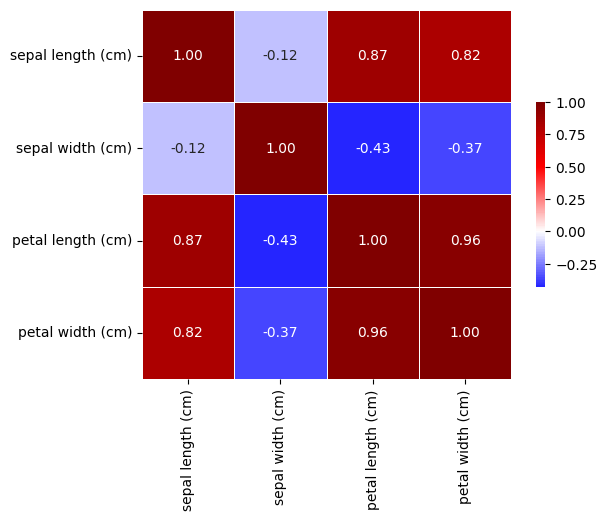

In [3]:
from sklearn.datasets import load_iris
data = load_iris()
data = pd.DataFrame(data.data, columns=data.feature_names)
plot_correlation_heatmap(data=data, ignore_warnings=True)

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def correlate_functions_to_target(*, column_name, data, target, return_subset=False, drop_na=False, ignore_warnings=False):
    if ignore_warnings:
        import warnings
        warnings.filterwarnings("ignore")
        
    subset = pd.DataFrame()
    subset[column_name] = data[column_name]
    subset[f"sin_{column_name}"] = np.sin(data[column_name])
    subset[f"cos_{column_name}"] = np.cos(data[column_name])
    subset[f"tan_{column_name}"] = np.tan(data[column_name])
    subset[f"log_{column_name}"] = np.log(data[column_name])
    subset[f"exp_{column_name}"] = np.exp(data[column_name])
    subset[f"sqrt_{column_name}"] = np.sqrt(data[column_name])
    subset[f"log1p_{column_name}"] = np.log1p(data[column_name])
    subset[f"square_{column_name}"] = np.square(data[column_name])
    subset[f"reciprocal_{column_name}"] = np.reciprocal(data[column_name])
    subset[f"abs_{column_name}"] = np.abs(data[column_name])
    subset[f"sign_{column_name}"] = np.sign(data[column_name])
    subset[f"arcsin_{column_name}"] = np.arcsin(data[column_name] / np.max(data[column_name]))
    subset[f"arccos_{column_name}"] = np.arccos(data[column_name] / np.max(data[column_name]))
    subset[f"arctan_{column_name}"] = np.arctan(data[column_name])
    subset[f"sinh_{column_name}"] = np.sinh(data[column_name])
    subset[f"cosh_{column_name}"] = np.cosh(data[column_name])
    subset[f"tanh_{column_name}"] = np.tanh(data[column_name])
    subset[f"standardized_{column_name}"] = (data[column_name] - np.mean(data[column_name])) / np.std(data[column_name])
    subset[f"minmax_{column_name}"] = (data[column_name] - np.min(data[column_name])) / (np.max(data[column_name]) - np.min(data[column_name]))
    subset[f"rolling_mean_{column_name}"] = data[column_name].rolling(window=5).mean()
    subset[f"diff_{column_name}"] = data[column_name].diff()
    subset[f"cumsum_{column_name}"] = data[column_name].cumsum()
    subset[f"cumprod_{column_name}"] = data[column_name].cumprod()

    if drop_na:
        subset = subset.replace([np.inf, -np.inf], np.nan).dropna()
    if return_subset:
        return subset.corrwith(data[target]), subset
    return subset.corrwith(data[target])

def plot_correlation_heatmap(*, data, annot=True, cmap='seismic', ignore_warnings=False):
    if ignore_warnings:
        import warnings
        warnings.filterwarnings("ignore")
        
    corr = data.corr()
    sns.heatmap(corr, annot=annot, fmt=".2f", cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
    plt.show();

In [ ]:
data = pd.read_csv('https://github.com/ageron/handson-ml2/raw/master/datasets/housing/housing.csv')
subset, corr_matrix = correlate_functions_to_target(column_name="total_rooms", data=data, target="median_house_value", return_subset=True, drop_na=False, ignore_warnings=True)
sns.heatmap(corr_matrix, annot=True)
plt.xlabel("Median_house_value")

<Axes: >

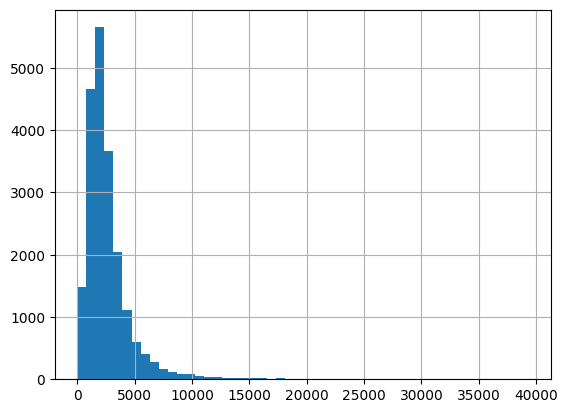

In [ ]:
data['total_rooms'].hist(bins=50);

In [ ]:
def convert_categorical_to_numerical(*, data, column_name):
    data[column_name] = pd.Categorical(data[column_name])
    data["numerical_", column_name] = data[column_name].cat.codes
    return data